In [27]:
import numpy as np
import math
import cv2
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import tools
import pandas as pd
import sys

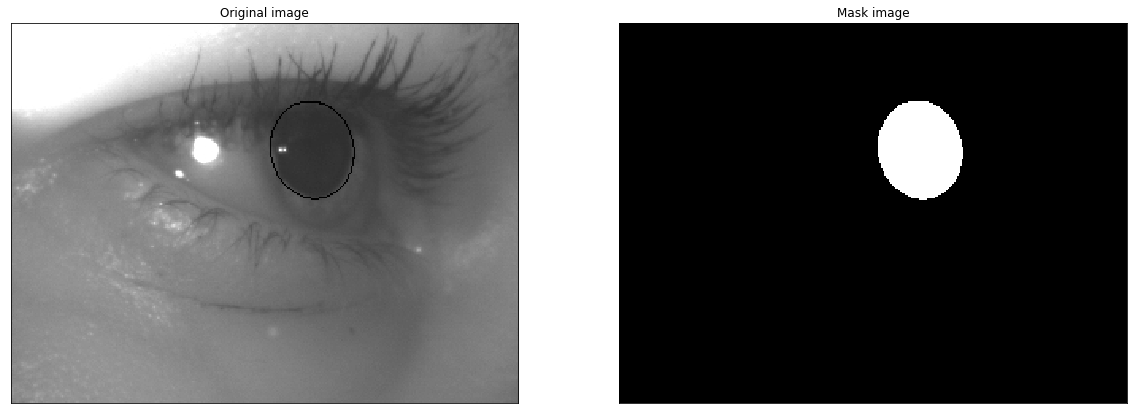

True

In [28]:
##Paths of image and corresponding annotation and destination path of mask:
image_path = '../images/elps_eye_2127.png'
annotation_path = '../annotations/elps_eye_2127.txt'

##Import image and characteristics:
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
height, width = img.shape

## Create the future mask image as a plain black image:
mask = np.zeros((height,width,3), np.uint8)
mask[:,:] = (255, 255, 255)

## Import the coordinates of all points of the ellipse:
data = pd.read_csv(annotation_path, header=None)
nb_coord = data.shape[1]
coord_list = []

for i in range(nb_coord):
    coord_list.append(data[i][0])

coord_list = coord_list[: -2]
coord_array = np.asarray(coord_list)
points = coord_array.reshape([-1, 2])

## Cast coordinates to 32 bits floats (64 bits floats not accepted by cv2.fitEllipse):
pts = points.astype(np.float32)

##Output of fitEllipse = rotated rectangle : 'rect' = [(xc, yc), (a, b), theta]:
rect = cv2.fitEllipse(pts)
xc = rect[0][0]
yc = rect[0][1]
a = rect[1][0]
b = rect[1][1]
theta = rect[2]

## Conversion from Cytomine coordinates system to opencv coordinates system:
liste = [[xc, yc], [a, b], theta]
liste[0][1] = height - liste[0][1]
tup1 = (liste[0][0], liste[0][1])
tup2 = (liste[1][0], liste[1][1])
rect2 = (tup1, tup2, -liste[2])

## Black color:
color = (0, 0, 0) 

## Draw the ellipse on original and on mask image:
cv2.ellipse(img, rect2, color) 
cv2.ellipse(mask, rect2, color, thickness = -1) 

## Draw white mask on black image:
for y in range(width):
    for x in range(height): 
        if mask[x][y][0] == 255:
            mask[x][y][0] = 0
            mask[x][y][1] = 0
            mask[x][y][2] = 0
        else:
            mask[x][y][0] = 255
            mask[x][y][1] = 255
            mask[x][y][2] = 255

tools.multiPlot( 1, 2, ( img, mask),
                ( 'Original image', 'Mask image'),
                cmap_tuple=( cm.gray, cm.gray))

#cv2.imwrite('img.png', img)
#cv2.imwrite('mask.png', mask)